# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer: During the simulation we see that a number of "trials" are conducted in which the smartcab is confronted with a specific surrounding. The simulation then observes how the smartcab reacts to its surroundings (e.g. red light, green light, etc.) and appoints a reward to the smartcab's reaction depending on how good the reaction is. For example, a positive reward is given while the smartcab is idle at a red light, while negative reward is given if the smartcab remains idle at a green light.

During the simulation, it's obvious that the smartcab doesn't move. The traffic conditions (including both other vehicles and light changes) change, but the smartcab remains stationary throughout the simulation.

As previously mentioned, we see that positive rewards are given when the smartcab reacts in a way that a normal driver should (e.g. stopping at red lights, moving forward through green lights, etc.). However, as the smartcab is stationary during this simulation, positive rewards when idle at a red light, as well as when idle at a green light with oncoming traffic. Negative rewards are then appointed when the smartcab remians idle at a green light with no oncoming traffic.

The light changing colour affects the rewards, as remaining idle at a red light is the correct and safe thing to do. However, the rewards decrease significantly when the smartcab remains idle at a green light with oncoming traffic. This is most likely because, while the smartcab must be aware of the oncoming traffic, it should still proceed through the intersection as the light is green. Obviously, a negative reward is appointed when the smartcab remains idle at a green light with no oncoming traffic, as the smartcab should proceed through the intersection, as traffic could build up behind it.**

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:

agent.py: 
    - num_dummies = this flag determines the discrete number of dummy agents in the environment, with a default of 100. This flag could alter the number of times that the smartcab experiences a situation involving another vehicle during the simulation.
    - grid_size = this flag determines the discrete number of intersections (columns, rows, default 8, 6) in the environment. This flag could alter the number of times the smartcab experiences light changes and vehicle interaction at intersections during the simulation.
    - enfore_deadline = this flag enforces a deadline metric on the smartcab. This metric is most likely set to true when considering the reliability (ability for the agent to reach its deadline on time) of the smartcab during the simulations.
    
environment.py:
    - When an agent performs an action, it seems that the act() function (Environment.act) is the Environment class function called.
    
simulator.py:
    - It seems that the purpose of both of these functions is to render the current state of the simulation at each step in the simulation. However, it is specified that the render_text() function displays this state in a non-GUI format (i.e. in a textual manner), while the render() function displays the current state using a GUI (Graphical User Interface) format (i.e. a visual manner) through the pygame module. This allows both a visual representation and a textual history of the states of the simulation.
    
planner.py:
    - It seems that the next_waypoint() function considers the East-West direction first, and then considers the North-South direction.

**

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


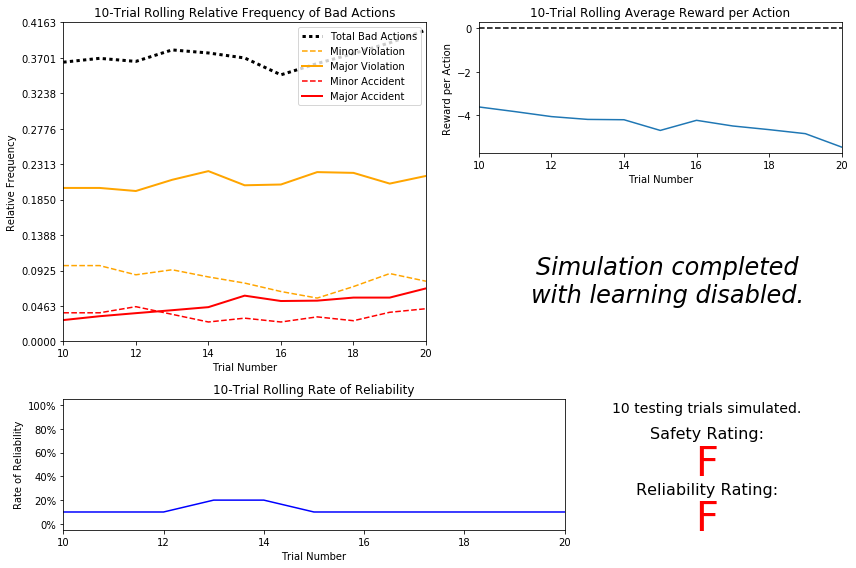

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer: 

- The driving agent is making bad decisions quite frequently, ranging from roughly 35-42% of the time. Additionaly, minor accidents occured roughly 3-5% of the time, while major accidents occured approximately 3-7% of the time. It's also important to note that the percentage of major accidents generally increased with each trial. While the driving agent is making bad decisions quite often, this result actually makes sense. Since the driving agent is set to perform random action, and doesn't learn from its experience, poor decisions leading to minor and major accidents should continue on a relatively constant basis. 

- Given that the agent is driving randomly, the rate of reliability does make sense. We see a rate of reliability of roughly 10% at the 10th trial which remains relatively constant through the 20th trial (with a slight exception of a peak of ~20% for trials 13 and 14. As mentioned previously, this consistently poor reliability is due to the fact that the driving agent is not learning from its previous mistakes, and will always continue to make decisions and actions randomly. 

- Overall, we see that the driving agent is receiving very poor rewards for its actions, beginning at -4 rewards/action and generally decreasing to approximately -6 rewards/action over the 10 trial testing period. This decrease in rewards/action is most likely the reason we see a correlation to the number of major accidents occuring (which increases over the testing simulation). Taking these poor values into consideration, it seems that the driving agent is not being heavily penalized for its action, which is consistent with the randomness associated with the actions and reward system.

- As mentioned in the above bullets, none of the results change significantly, however some change can be noted in each of the results. We see the major accident percentage increase over the testing period, while the rewards per action decreases over the testing period. Additionally, we see a small change occur in the reliability as it briefly increases before decreasing by roughly the same amoung. 

- I think it is clear to say that the Smartcab would not be considered safe or reliable for its passengers. Aside from the obvious F grades received in both safety and reliability, a vehicle making poor decisions ~40% of the time is clearly not safe. Random actions result in both minor and major accidents, as well as minor traffic violations (10% of the time), and major traffic violations (20% of the time). Additionally, the smartcab is consistently late 90% of the time, further proving that this Smartcab should be avoided in its current state.**

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer: 

- Features most relevant for learning both safety and efficiency:


1. waypoint: I would consider waypoint to be a relevant feature as the heading of the Smartcab must be observed by the driving agent to ensure the Smartcab efficiently reaches its destination.

2. inputs (light): It is important that the Smartcab knows the current colour of the intersection lights to learn that penalty will occur for remaining idle during a green light, and accidents (as well as traffic violations) will occur from driving through intersections with red lights.

3. inputs (left): I believe this feature is relevant as it relays to the Smartcab information as to whether a vehicle is present to the Smartcab's left. An easy scenario to imagine is when the Smartcab advances to the right while presented with a red light. While this maneuver is legal, it is important to be aware of whether or not a vehicle is present to the left of the Smartcab that my be advancing straight through the green light. Being unaware of this advance will most likely result in minor and potentially major accidents. 

4. inputs (oncoming): This feature is relevant in manner similar to that of the left input. The Smartcab should be aware of oncoming vehicles in the event of a desired left turn. If not aware, the Smartcab may attempt to turn left through an intersection (with a green light) while a vehicle is heading through the green light in the opposite direction, resulting in a minor or major accident. 


- Features not relevant for learning both safety and efficiency:


1. inputs (right): This feature, used to inform the Smartcab of a vehicle present on its right, does not seem to provide any extra information that could help the Smartcab to reduce potential accidents and/or traffic violations, or to increase reliability. In the event of a green or red light, the Smartcab should be able to safely advance without the information of a vehicle's presence on its right (assuming all other vehicles obey traffic rules). Similarly, a right turn on a red light warrants only for the information of a car present to the left of the Smartcab, and does not require information regarding a vehicle to its right, since the right hand lane is never crossed or entered. 

2. deadline: While reliability is an important factor, I believe that through the rewards system, the Smartcab will learn to advance as quickly and safely as possible, whether the deadline feature is known or not. As safety is considered the most important parameter, sacrificing safety to arrive more quickly (resulting in potential traffic violations and accidents) should not be considered. **

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:

waypoint -> 3 states (forward, left right)

inputs (light) -> 2 states (green, red)

inputs (left) -> 4 states (None, forward, left, right)

inputs (oncoming) -> 4 states (None, forward, left, right)

possible actions -> 4 states (None, forward, left, right)


If the actions are not considered in the size of the state space, then the total number of states considering only the combinations of features is 96  (3 x 2 x 4 x 4). If the possible actions are taken into consideration, the total number of states becomes 384 (3 x 2 x 4 x 4 x 4). Given what we know about the simulation and the environment, I believe the driving agent could learn a policy for each possible state within a reasonable number of training trials. As 384 is a relatively small number of states given the potential complexity of these types of problems, I believe a policy could definitely be determined for each possible state.**

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

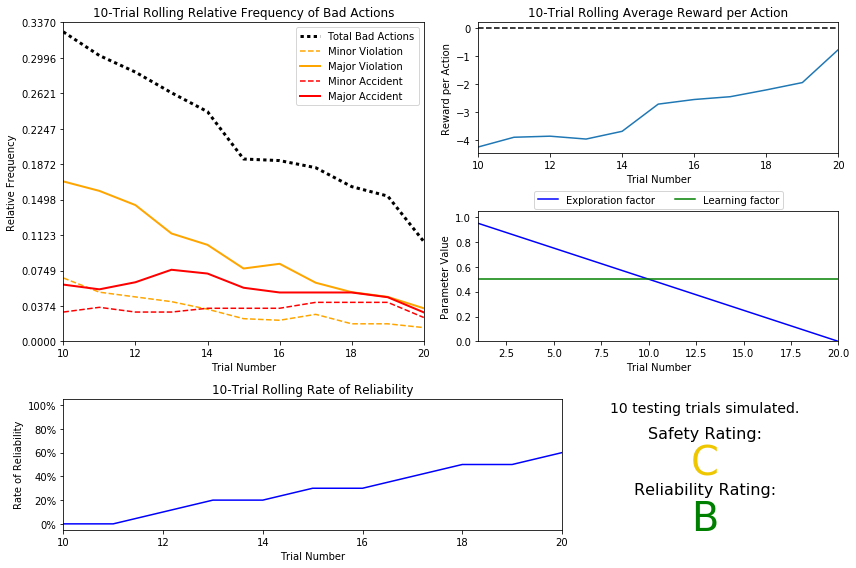

In [9]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:

- The most obvious obverservation is that the results behave drastically different when comparing the basic driving agent and the default Q-Learning agent. Bad actions, major violations, and major accidents all significantly decreased over the course of the trials when using the Q-Learning agent (from roughly 34% to 11%, 18% to 3%, and 8% to 3%, respectively), while these results remained relatively constant when using the basic driving agent. Additionally, the Q-Learning agent's rate of reliability and average reward per action significantly increased over the trials (1% to 60% and -5 to -1, respectively), while the same results from the basic driving agent remained relatively constant. 


- We see that the driving agent required 20 training trials before testing began. This number makes sense since our decay function decremented 0.05 at each training trial with a defaul epsilon tolerance of 0.05. Therefore, 1 - (20 x 0.05) = 0 (which is less than 0.05). 


- Yes, the implemented decaying function for e (the exploration factor) seems to accurately be represented in the parameters panel as it decreases from approximately 1 to 0 over the 20 trials.


- As the number of training trials increased, the number of bad actions decreased quite significantly, while the average reward increased quite significantly, as mentioned in the first bullet.


- The safety and reliability ratings determined here are C and B respectively. These ratings are much higher than the multiple F ratings returned using the initial basic driving agent.
**

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

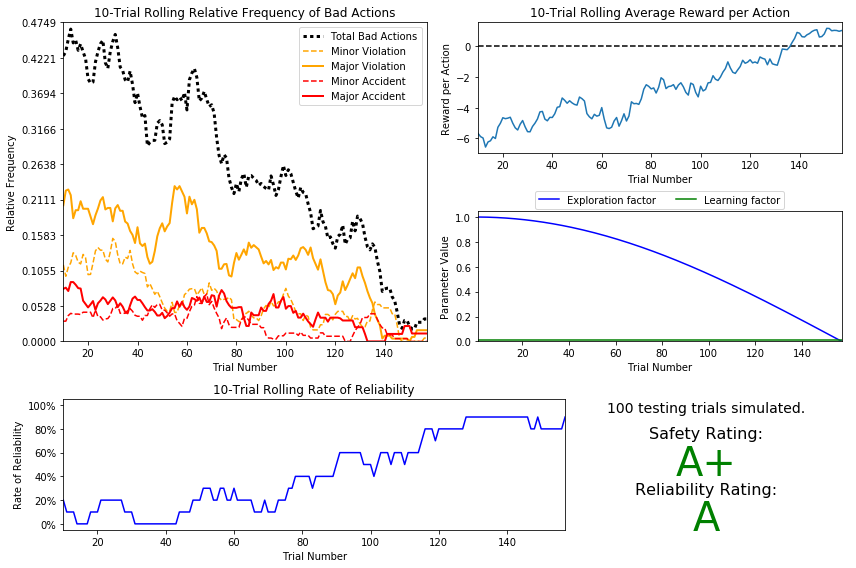

In [11]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer: After a number of attempts at varying parameters within agent.py (specifically, tolerance, epsilon, alpha, n_test, and the decay function, a Q-Learning algorithm was used to produce a simulation with safety and reliability ratings of A+ and A, respecitvely.

- The decaying function used in this simulation for epsilon (the exploration factor) was the epsilon = ABS(cos(at)) function. After attempting to use the three other suggested decaying functions, this function seemed to produce the best results.


- Approximately 150-160 training trials were needed for the agent before testing could begin. As I set an n_test value of 100, it makes sense that a large number of training trials would be used to ensure that an ample amount of scenarios could be trained upon. 


- After some experimentation an epsilon-tolerance of 0.001 and an alpha (learning rate) value of 0.01 was used. These values were determined through trial and error. It seemed that moving these values closer and closer to 0 seemed to increase the algorithms ability to reduce bad actions and increase the rate of reliability.


- When comparing this final Q-Learner to the default Q-Learner, some obvious observations can be made. Firstly, while the percentage of bad actions may start at higher percentage in the final Q-Learner (45% vs. 33%), it decreases to a much smaller percentage by the end of the testing set (3% vs. 11%). This tells us that the final Q-Learner is able to essentially make better decisions which lead to less major and minor accidents, and cause less minor and major traffic violations. Additionally, we see that this final Q-Learner is able to reach rates of reliability of approximately 90%, while the default Q-Learner seemed to max out at approximately 60%. This is a significant increase in reliability, and when paired with the increase in safety (shown directly as the decrease in bad decisions), we see that much improvement has been made from the default to the current Q-Learner. Finally, we see that the average reward per action in the final learner increases almost to 1, while the defaul Q-Learner maxed out at values approaching 0 from negative 1. 


- After analyzing these results, I would say that these Q-Learner restuls show that this driving agent successfully learned an appropriate policy. As safety and reliability ratings are A+ and A respectively, it shows that safety is of the utmost importance, but this emphasis on safety does not greatly sacrifice its ability to be reliable. The optimized Q-Learner has determined an appropriate policy to ensure that the passenger arives safely (first and foremost) and timely.


- Yes, I am satisfied with the safety and reliability ratings of the Smartcab. As mentioned above, the Smartcab emphasizes safety, so a customer never has to worry about accidents along the way. Additionally, the A reliability rating still ensures that the customer will arrive in a timely manner. These results are excellent and result in a Smartcab that could be trusted.
**

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:

An optimal policy for this problem could be shown as the following for the Smartcab at a red light with the intention of going forward and no oncoming traffic. For each action all four states are avaiable {None, forward, left, right}:

            Action:       Policy:
              Left          Incorrect
              Forward       Incorrect
              Right         Suboptimal
              None          Optimal
              
By examining the sim_improved-learning.txt text file, I was able to find this same scenario with the following results:

('forward', 'red', None, None)

 -- forward : -3.42
 
 -- None : 1.09
 
 -- right : 0.29
 
 -- left : -5.72
 
 
As expected, we see that the highest reward (1.09) is given to the optimal policy, which, in this case is None. This result matches the assumption I presented above. Additionally, 'right', determined to be suboptimal, gives a reward of 0.29. As expected, the forward and left values give the Smartcab heavy penalties, as they are likely to cause an accident or traffic violation. Right, in this case, is considered suboptimal, as while it is not the intended route, it is still a legal maneuver, and is unlikely to cause an accident (as right turns on red lights are allowed). 

By examining the sim_improved-learning.txt text file, I was able to find this same scenario which could be considered suboptimal:

('forward', 'green', 'left', 'forward')

 -- forward : 0.00
 
 -- None : -0.10
 
 -- right : 0.03
 
 -- left : -0.20
 
 
In this scenario, we see that while forward is the waypoint destination, the Q-Learner has determined right to be the optimal direction to advance. While not penalized for going in the intended direction, the right direction will be chosen. This will affect the reliability of the Q-Learner, and decisions like these are most likely why the reliability rating is given as A instead of A+.

Another suboptimal scenario from the text file is shown as:

('left', 'green', 'right', 'left')

 -- forward : 0.01 
 
 -- None : 0.00 
 
 -- right : 0.02
 
 -- left : 0.02


This situation is similar to the last example, in that this scenario will lessen the reliability rating, and most likely contributes to the A score. In this case, the Q-Learner could realistically go in any direction. Additionally, we see that while left is the intended direction, there is an equal chance the Smartcab will choose to go right, which is the exact opposite direction. As mentioned, this will affect the ability to deliver the customer to his/her destination in a timely manner.

** 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer: 

I believe the reason regarding the environment has to do with the fact that the destinations are randomly selected and unique for each training or testing trial. Essentially, the agent is responsible for learning a new goal (in addition to current location information) for each trial. This inconsistent goal most likely makes determining a future reward difficult, as future rewards would be based on destination policies, instead of traffic law policies (as in this case). Specifically, updating the Q-value at time t will lead the Smartcab to make bad decisions, as the negative penalties allotted due to bad actions are significantly smaller than some large future reward of meeting the specified goal. Additionally, there doesn't seem to be a way to decrease the value of future rewards as compared to that of the negative penalties without essentially invalidating the future reward goal (which is difficult to set, as it differs between each trial). 

Regarding the Smartcab itself, I believe the second reason relates to the fact that the Smartcab is only able to make decisions and execute them based on some states derived from an arbitrary intersection (without truly taking into consideration the relationship between the current intersection, future intersections, and the final destination). The environment does not (to my knowledge) alert the Smartcab agent of the current coordinate location, meaning that location information can't be used by the Q-Learning agent's state table to weight actions at a particular intersection against potential future decisions. Essentially, since the Smartcab is not aware of its location relative to the entire grid, no bias can be imposed for the Smartcab to move to some future intersection (where it again will have no knowledge of its location with respect to the grid). The Smartcab is forced to make one decision at a time in order to arrive at its destination based on decisions made at its current state. 
**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.